## makemore: part 5

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [3]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
print(len(words))
print(max(len(w) for w in words))
print(words[:8])


32033
15
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']


In [4]:
torch.device='cuda'

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [6]:
# shuffle up the words
import random
random.seed(42)
random.shuffle(words)

In [7]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [7]:
words=words[:8]

In [8]:
words

['yuheng',
 'diondre',
 'xavien',
 'jori',
 'juanluis',
 'erandi',
 'phia',
 'samatha',
 'phoenix',
 'emmelynn',
 'hollan',
 'hollis',
 'callalily',
 'adelayde',
 'josephyne',
 'weldon',
 'kayle',
 'ragnar',
 'colbie',
 'taveon',
 'aki',
 'peyten',
 'kevari',
 'joella',
 'mecca',
 'egan',
 'justyce',
 'taliyah',
 'hayley',
 'alleah',
 'kymberlynn',
 'parrish',
 'houstyn',
 'jamaya',
 'ahmod',
 'nivin',
 'milli',
 'cristiana',
 'jaimee',
 'mitchell',
 'nairah',
 'lorena',
 'gentrie',
 'torrion',
 'savian',
 'benjamine',
 'airess',
 'knute',
 'sultana',
 'danai',
 'azzan',
 'issabelle',
 'abrahim',
 'aislyn',
 'aerys',
 'malaiya',
 'kieon',
 'ayansh',
 'berklee',
 'emmakate',
 'avaneesh',
 'amenadiel',
 'renardo',
 'brekken',
 'kamry',
 'wylin',
 'trixie',
 'breslynn',
 'bianka',
 'mordchai',
 'haoyu',
 'frankie',
 'josselin',
 'saila',
 'kionna',
 'jennings',
 'arlington',
 'jupiter',
 'aleisha',
 'kemorah',
 'denisse',
 'zada',
 'kaydynce',
 'bari',
 'darya',
 'ellieanne',
 'gretel',
 

In [9]:
# build the dataset
block_size = 8 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  
  for w in words:
    context = [0] * block_size
    # print(context)
    for ch in w + '.':
      # print(ch)
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]# crop and append
      # print(context)

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     # 80%
Xdev, Ydev = build_dataset(words[n1:n2])   # 10%
Xte,  Yte  = build_dataset(words[n2:])     # 10%

torch.Size([182625, 8]) torch.Size([182625])
torch.Size([22655, 8]) torch.Size([22655])
torch.Size([22866, 8]) torch.Size([22866])


In [10]:
Xtr

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 25],
        [ 0,  0,  0,  0,  0,  0, 25, 21],
        [ 0,  0,  0,  0,  0, 25, 21,  8],
        [ 0,  0,  0,  0, 25, 21,  8,  5],
        [ 0,  0,  0, 25, 21,  8,  5, 14],
        [ 0,  0, 25, 21,  8,  5, 14,  7],
        [ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  4],
        [ 0,  0,  0,  0,  0,  0,  4,  9],
        [ 0,  0,  0,  0,  0,  4,  9, 15],
        [ 0,  0,  0,  0,  4,  9, 15, 14],
        [ 0,  0,  0,  4,  9, 15, 14,  4],
        [ 0,  0,  4,  9, 15, 14,  4, 18],
        [ 0,  4,  9, 15, 14,  4, 18,  5],
        [ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 24],
        [ 0,  0,  0,  0,  0,  0, 24,  1],
        [ 0,  0,  0,  0,  0, 24,  1, 22],
        [ 0,  0,  0,  0, 24,  1, 22,  9],
        [ 0,  0,  0, 24,  1, 22,  9,  5],
        [ 0,  0, 24,  1, 22,  9,  5, 14],
        [ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  

In [11]:
Ytr

tensor([25, 21,  8,  5, 14,  7,  0,  4,  9, 15, 14,  4, 18,  5,  0, 24,  1, 22,
         9,  5, 14,  0, 10, 15, 18,  9,  0, 10, 21,  1, 14, 12, 21,  9, 19,  0,
         5, 18,  1, 14,  4,  9,  0])

In [10]:
for x,y in zip(Xtr[:20], Ytr[:20]):
  print(''.join(itos[ix.item()] for ix in x), '-->', itos[y.item()])

........ --> y
.......y --> u
......yu --> h
.....yuh --> e
....yuhe --> n
...yuhen --> g
..yuheng --> .
........ --> d
.......d --> i
......di --> o
.....dio --> n
....dion --> d
...diond --> r
..diondr --> e
.diondre --> .
........ --> x
.......x --> a
......xa --> v
.....xav --> i
....xavi --> e


In [11]:
# Near copy paste of the layers we have developed in Part 3

# -----------------------------------------------------------------------------------------------
class Linear:
  
  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out)) / fan_in**0.5 # note: kaiming init
    self.bias = torch.zeros(fan_out) if bias else None
  
  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out
  
  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])

# -----------------------------------------------------------------------------------------------
class BatchNorm1d:
  
  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)
  
  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      if x.ndim == 2:
        dim = 0
      elif x.ndim == 3:
        dim = (0,1)
      xmean = x.mean(dim, keepdim=True) # batch mean
      xvar = x.var(dim, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out
  
  def parameters(self):
    return [self.gamma, self.beta]

# -----------------------------------------------------------------------------------------------
class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class Embedding:
  
  def __init__(self, num_embeddings, embedding_dim):
    self.weight = torch.randn((num_embeddings, embedding_dim))
    
  def __call__(self, IX):
    self.out = self.weight[IX]
    return self.out
  
  def parameters(self):
    return [self.weight]

# -----------------------------------------------------------------------------------------------
class FlattenConsecutive:
  
  def __init__(self, n):
    self.n = n
    
  def __call__(self, x):
    B, T, C = x.shape
    x = x.view(B, T//self.n, C*self.n)
    if x.shape[1] == 1:
      x = x.squeeze(1)
    self.out = x
    return self.out
  
  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class Sequential:
  
  def __init__(self, layers):
    self.layers = layers
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    self.out = x
    return self.out
  
  def parameters(self):
    # get parameters of all layers and stretch them out into one list
    return [p for layer in self.layers for p in layer.parameters()]


In [12]:
torch.manual_seed(42); # seed rng for reproducibility

In [13]:
# original network
# n_embd = 10 # the dimensionality of the character embedding vectors
# n_hidden = 300 # the number of neurons in the hidden layer of the MLP
# model = Sequential([
#   Embedding(vocab_size, n_embd),
#   FlattenConsecutive(8), Linear(n_embd * 8, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   Linear(n_hidden, vocab_size),
# ])

# hierarchical network
n_embd = 24 # the dimensionality of the character embedding vectors
n_hidden = 128 # the number of neurons in the hidden layer of the MLP
model = Sequential([
  Embedding(vocab_size, n_embd),
  FlattenConsecutive(2), Linear(n_embd * 2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  # FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  # FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(n_hidden, vocab_size),
])

# parameter init
with torch.no_grad():
  model.layers[-1].weight *= 0.1 # last layer make less confident

parameters = model.parameters()
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

76579


In [14]:
for p in parameters:
  print(p.shape)
  

torch.Size([27, 24])
torch.Size([48, 128])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128])
torch.Size([128])
torch.Size([128])
torch.Size([128, 27])
torch.Size([27])


In [87]:
for layer in model.layers:
    if __name__ == '__main__':
        print(layer.__class__.__name__, ':', tuple(layer.out.shape))

AttributeError: 'Embedding' object has no attribute 'out'

In [88]:
from torchsummary import summary

# Assuming your model is named 'model' and you have defined it already
# Set the device to GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)

# Print the summary of the model
summary(model, input_size=(block_size,))

AttributeError: 'Sequential' object has no attribute 'apply'

In [17]:
c= torch.randn((32,10))
c

tensor([[ 2.7692e-01,  3.3123e-01,  9.5567e-01, -4.4056e-01,  1.1275e+00,
          5.5672e-01, -2.7995e-01,  2.2461e+00,  1.8780e+00, -9.0068e-01],
        [ 4.7722e-01, -1.7260e+00,  1.1395e+00,  5.5583e-02,  5.3190e-02,
          2.9032e-01, -4.3431e-01,  2.2169e-01,  1.6677e-01, -9.1536e-01],
        [-6.3673e-01, -1.2775e+00,  1.1019e+00,  2.0902e-01, -1.4688e+00,
          7.9175e-02, -6.4701e-01, -1.2092e+00, -1.2895e+00, -8.3488e-01],
        [-5.5619e-01, -1.5599e+00,  1.3411e+00,  8.7052e-01, -1.4768e+00,
          2.5891e-01, -1.0039e+00, -1.0261e+00, -1.1622e+00,  3.3705e-01],
        [ 1.9034e+00, -5.8523e-01, -1.3545e+00,  1.8083e-01, -1.7898e-01,
         -2.8103e-01,  2.2207e-01,  1.6216e+00,  5.9010e-01,  2.0868e+00],
        [-1.1036e+00, -1.8648e-01, -7.4526e-02, -4.7389e-02, -1.1789e+00,
         -4.3962e-02,  1.1523e+00,  2.2175e-01, -6.4735e-02, -8.3929e-01],
        [-6.9309e-01,  1.2388e+00, -3.4414e-01, -5.3386e-01, -1.0611e-01,
         -1.4056e+00,  1.0493e+0

In [18]:
c[1]

tensor([ 0.4772, -1.7260,  1.1395,  0.0556,  0.0532,  0.2903, -0.4343,  0.2217,
         0.1668, -0.9154])

In [15]:
# same optimization as last time
max_steps = 20000
batch_size = 32
lossi = []

for i in range(max_steps):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,))
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y
  
  # forward pass
  logits = model(Xb)
  loss = F.cross_entropy(logits, Yb) # loss function
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update: simple SGD
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())


      0/  20000: 3.3167
  10000/  20000: 2.0576


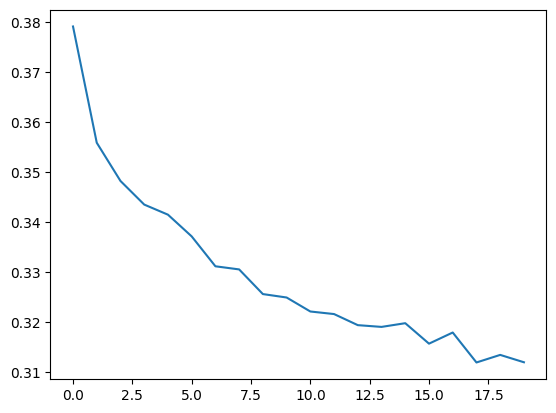

In [16]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))

In [17]:
# put layers into eval mode (needed for batchnorm especially)
for layer in model.layers:
  layer.training = False

In [18]:
# evaluate the loss
@torch.no_grad() # this decorator disables gradient tracking inside pytorch
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  logits = model(x)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.062044382095337
val 2.116501569747925


### performance log

- original (3 character context + 200 hidden neurons, 12K params): train 2.058, val 2.105
- context: 3 -> 8 (22K params): train 1.918, val 2.027
- flat -> hierarchical (22K params): train 1.941, val 2.029
- fix bug in batchnorm: train 1.912, val 2.022
- scale up the network: n_embd 24, n_hidden 128 (76K params): train 1.769, val 1.993


In [89]:
# sample from the model
for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    # print(context)
    while True:
      # forward pass the neural net
      logits = model(torch.tensor([context]))
      probs = F.softmax(logits, dim=1)
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1).item()
      # shift the context window and track the samples
      context = context[1:] + [ix]
      out.append(ix)
      # if we sample the special '.' token, break
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out)) # decode and print the generated word

merzoel.
zariah.
demormoni.
charvel.
picgonesne.
slei.
micha.
mileen.
isan.
aruhay.
lilee.
makhi.
valehaj.
chaideson.
chalees.
marya.
marashe.
jaddezy.
ara.
eley.


### Next time:
Why convolutions? Brief preview/hint

In [20]:
context

[0, 4, 5, 12, 22, 9, 14, 0]

In [15]:
for x,y in zip(Xtr[7:15], Ytr[7:15]):
  print(''.join(itos[ix.item()] for ix in x), '-->', itos[y.item()])

........ --> d
.......d --> i
......di --> o
.....dio --> n
....dion --> d
...diond --> r
..diondr --> e
.diondre --> .


In [16]:
# forward a single example:
logits = model(Xtr[[7]])
logits.shape

torch.Size([1, 27])

In [17]:
# forward all of them
logits = torch.zeros(8, 27)
for i in range(8):
  logits[i] = model(Xtr[[7+i]])
logits.shape

torch.Size([8, 27])

In [18]:
# convolution is a "for loop"
# allows us to forward Linear layers efficiently over space